# Capstone Project - The Battle of the Neighborhoods (Week 2)
### Applied Data Science Capstone by IBM/Coursera
## The London Coffee Shop Project

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Methodology](#methodology)
* [Data](#data)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

## Introduction: Business Problem <a name="introduction"></a>

A young entrepreneur has decided to open a coffee shop in London. The project is financially viable, but the location of the shop has not been selected yet. To make the best decision, the entrepreneur needs to know which borough and neighborhoods in London are the most profitable. We will need to explore the venues in London's boroughs to understand where the competition is located. This will help in determining the best location for the new shop. Also, we need to know which customers these competing venues serve. To this end, we will explore the boroughs further to predict how the new shop can be supported by nearby venues such as university campuses and other cultural venues. Ideally, the new coffee shop will be located in the borough with the highest concentration of potential customers and the lowest competing venues' concentration.

---
## Methodology <a name="methodology"></a>



In this project we will direct our efforts on detecting areas of London that have a high concentration of commercial activity, particularly those with high numbers of venues that can support our new business. We will limit our analysis to London borough and exclude the greater Lonodn area.

In first step we have collected the required data: georaphical coordinates of london boroughs and the locaition of its venues with their category.

Second step in our analysis will be calculation and exploration of 'venues across different areas of London. Once collected, we will move to the third step of the analysis. We will focus on most promising areas by creating clusters of location to identify where most of the commercial activity is located. We will use maps to visualise those areas and focus our analysis on the most promising cluster in the fourth step. Finally, Within the most promosing cluster, we will proceed by elemination and define further clusters to explore optimal venue location by supporting venues such as museums and hotels in order to choose a location within these areas.

---
## Data <a name="data"></a>

The data required for this project can be collected from multiple sources. The project relies primarily on the Foursquare API to collect data about the venues in London and their location. The Greater London Area will be covered in this project. The data is publicly available and is collected and organized from the Wikipedia <code>List of areas of London</code> page which can be found [HERE](https://en.wikipedia.org/wiki/List_of_areas_of_London). The data contains information about the location of the neighborhoods, their boroughs, towns, postcodes, dial codes, and OS grid ref. This project utilizes the columns <code>Location</code>, <code>London borough</code>, <code>Post town</code>, <code>Postcode district</code>; the other columns are not required and dropped from the dataframe. The data also requires cleaning, especially the data related to boroughs as they contain unnecessary references. The <code>Postcode district</code> column contains cells that have multiple postcodes that have been split into two rows to standardize the data and prepare it for geocoding. The data is then complemented with Latitude and Longitude data for the different postcodes which are collected using <code>geocoder</code> and <code>ArcGIS</code>.

---
## Analysis <a name="analysis"></a>

### Installing Llibraries

In [1]:
!pip install pandas
!pip install requests
!pip install bs4
!pip install plotly
!pip install folium
!pip install geocoder
!pip install numpy

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: Cryptograp

### Importing the required libraries

In [2]:
# Pandas for data analysis
import pandas as pd
print('Pandas imported...')

# Pandas for data analysis
import numpy as np
print('Numpy imported...')

# K-means from ScikitLearn
from sklearn.cluster import KMeans
print('Kmeans imported...')

# Folium for map visualisation
import folium
print('Folium imported...')

# Matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
print('Matplotlib imported...')

# import geocoder to get latitude and longitude coordinates
import geocoder
print('Geocoder imported...')

# to convert an address into latitude and longitude values
from geopy.geocoders import Nominatim
print('Nominatim imported...')


# Request and BeautifulSoup for websacrapping
import requests
print('requests imported...')

from bs4 import BeautifulSoup
print('BeautifulSoup imported...')

Pandas imported...
Numpy imported...
Kmeans imported...
Folium imported...
Matplotlib imported...
Geocoder imported...
Nominatim imported...
requests imported...
BeautifulSoup imported...


---
### Preparing the Data

The Greater London Area will be covered in this project. The data will be collected and organised from the wikipedia <code>List of areas of London</code> page which can be found at:
https://en.wikipedia.org/wiki/List_of_areas_of_London

#### Webscrapping
First, the wikipedia page url is prepared for scrapping

In [3]:
url = 'https://en.wikipedia.org/wiki/List_of_areas_of_London'

The data is already organised in a tablular format so it is possible to simply read it using pandas

In [4]:
dfs = pd.read_html(url)

The necessary dataframe can now be extracted. 

In [5]:
london_df = dfs[1]

# checking the data
london_df.head()

,Location,London borough,Post town,Postcode district,Dial code,OS grid ref
0,Abbey Wood,"Bexley, Greenwich [7]",LONDON,SE2,020,TQ465785
1,Acton,"Ealing, Hammersmith and Fulham[8]",LONDON,"W3, W4",020,TQ205805
2,Addington,Croydon[8],CROYDON,CR0,020,TQ375645
3,Addiscombe,Croydon[8],CROYDON,CR0,020,TQ345665
4,Albany Park,Bexley,"BEXLEY, SIDCUP","DA5, DA14",020,TQ478728


It is now possible to start cleaning the data. First, the columns are renamed.

In [6]:
london_df.columns = ['Neighborhood', 'Borough', 'Town', 'Postcode', 'Dialcode', 'OSgridRef']
london_df.head()

,Neighborhood,Borough,Town,Postcode,Dialcode,OSgridRef
0,Abbey Wood,"Bexley, Greenwich [7]",LONDON,SE2,020,TQ465785
1,Acton,"Ealing, Hammersmith and Fulham[8]",LONDON,"W3, W4",020,TQ205805
2,Addington,Croydon[8],CROYDON,CR0,020,TQ375645
3,Addiscombe,Croydon[8],CROYDON,CR0,020,TQ345665
4,Albany Park,Bexley,"BEXLEY, SIDCUP","DA5, DA14",020,TQ478728


Then the unnecessary informaiton from <code>Borough</code> column is removed.

In [7]:
london_df['Borough'] = london_df['Borough'].str.replace("[","")
london_df['Borough'] = london_df['Borough'].str.replace("]","")
london_df['Borough'] = london_df['Borough'].str.replace("0","")
london_df['Borough'] = london_df['Borough'].str.replace("1","")
london_df['Borough'] = london_df['Borough'].str.replace("2","")
london_df['Borough'] = london_df['Borough'].str.replace("3","")
london_df['Borough'] = london_df['Borough'].str.replace("4","")
london_df['Borough'] = london_df['Borough'].str.replace("5","")
london_df['Borough'] = london_df['Borough'].str.replace("6","")
london_df['Borough'] = london_df['Borough'].str.replace("7","")
london_df['Borough'] = london_df['Borough'].str.replace("8","")
london_df['Borough'] = london_df['Borough'].str.replace("9","")
london_df['Borough'] = london_df['Borough'].str.replace("10","")

In [8]:
#to see if the unnecessary informaiton has been cleaned as required
london_df.head()

,Neighborhood,Borough,Town,Postcode,Dialcode,OSgridRef
0,Abbey Wood,"Bexley, Greenwich",LONDON,SE2,020,TQ465785
1,Acton,"Ealing, Hammersmith and Fulham",LONDON,"W3, W4",020,TQ205805
2,Addington,Croydon,CROYDON,CR0,020,TQ375645
3,Addiscombe,Croydon,CROYDON,CR0,020,TQ345665
4,Albany Park,Bexley,"BEXLEY, SIDCUP","DA5, DA14",020,TQ478728


In [9]:
#to examine the data
london_df.shape

(531, 6)

Only the <code>Location</code>, <code>Borough</code>, <code>Town</code> and <code>Postcode</code> is required for the analysis so <code>Dialcode</code> and <code>OSgridRef</code> are removed

In [10]:
london_df = london_df[['Neighborhood', 'Borough', 'Town', 'Postcode']]
london_df.reset_index(drop=True, inplace=True)
london_df.head()

,Neighborhood,Borough,Town,Postcode
0,Abbey Wood,"Bexley, Greenwich",LONDON,SE2
1,Acton,"Ealing, Hammersmith and Fulham",LONDON,"W3, W4"
2,Addington,Croydon,CROYDON,CR0
3,Addiscombe,Croydon,CROYDON,CR0
4,Albany Park,Bexley,"BEXLEY, SIDCUP","DA5, DA14"


In [11]:
#to examine the data after manipulation
london_df.shape

(531, 4)

Rows with multiple <code>Postcode</code> values, Such as <code>Acton W3, W4</code> are spread to multiple rows with the same values for the reamining columns.

In [12]:
london_df = (london_df.set_index(['Neighborhood', 'Borough', 'Town'])
   .apply(lambda x: x.str.split(',').explode())
   .reset_index())

london_df.head()

,Neighborhood,Borough,Town,Postcode
0,Abbey Wood,"Bexley, Greenwich",LONDON,SE2
1,Acton,"Ealing, Hammersmith and Fulham",LONDON,W3
2,Acton,"Ealing, Hammersmith and Fulham",LONDON,W4
3,Addington,Croydon,CROYDON,CR0
4,Addiscombe,Croydon,CROYDON,CR0


In [13]:
#examine the data after manipulation
london_df.shape

(636, 4)

Remove white space from <code>Postcode</code> and convert <code>Town</code> to title case

In [14]:
london_df['Postcode'] = london_df['Postcode'].str.strip()
london_df['Town'] = london_df['Town'].str.title()
london_df.head()

,Neighborhood,Borough,Town,Postcode
0,Abbey Wood,"Bexley, Greenwich",London,SE2
1,Acton,"Ealing, Hammersmith and Fulham",London,W3
2,Acton,"Ealing, Hammersmith and Fulham",London,W4
3,Addington,Croydon,Croydon,CR0
4,Addiscombe,Croydon,Croydon,CR0


Subet is used to only include postcodes with London as <code>Town</code>.

In [15]:
london_df = london_df[london_df['Town'] == 'London']
london_df.reset_index(drop=True, inplace=True)
#examine the data after manipulation
london_df.head()

,Neighborhood,Borough,Town,Postcode
0,Abbey Wood,"Bexley, Greenwich",London,SE2
1,Acton,"Ealing, Hammersmith and Fulham",London,W3
2,Acton,"Ealing, Hammersmith and Fulham",London,W4
3,Aldgate,City,London,EC3
4,Aldwych,Westminster,London,WC2


In [16]:
#examine the data after manipulation
london_df.tail()

,Neighborhood,Borough,Town,Postcode
350,Woodford,Redbridge,London,IG8
351,Woodford,Redbridge,London,E18
352,Woodside Park,Barnet,London,N12
353,Woolwich,Greenwich,London,SE18
354,Wormwood Scrubs,Hammersmith and Fulham,London,W12


In [17]:
#examine the data after manipulation
london_df.shape

(355, 4)

The coordinates for the different postcodes are collected using <code>geocoder</code> and <code>ArcGIS</code>

In [18]:
#Function to get coordinates
def get_coord(arcgis_geocoder):
    
    # Initialize the Location (lat. and long.) to "None"
    lat_lng_coords = None
    #  loop  to geocode all locations
    while(lat_lng_coords is None):
        g = geocoder.arcgis('{}, London, United Kingdom'.format(arcgis_geocoder))
        lat_lng_coords = g.latlng
    return lat_lng_coords

Getting the coordinated adn preparing <code>geo_tag_coord</code> dataframe.

In [19]:
postal_codes = london_df['Postcode']
coordinates = [get_coord(postal_code) for postal_code in postal_codes.tolist()]

In [20]:
geo_tag_coord = pd.DataFrame(coordinates, columns = ['Latitude', 'Longitude'])
geo_tag_coord.head()

,Latitude,Longitude
0,51.499741,0.124061
1,51.507408,-0.127699
2,51.507408,-0.127699
3,51.513145,-0.078733
4,51.514625,-0.114860


Adding Latitude and Longitude to <code>london_df</code>

In [21]:
london_df['Latitude'] = geo_tag_coord['Latitude']
london_df['Longitude'] = geo_tag_coord['Longitude']
london_df.head()

,Neighborhood,Borough,Town,Postcode,Latitude,Longitude
0,Abbey Wood,"Bexley, Greenwich",London,SE2,51.499741,0.124061
1,Acton,"Ealing, Hammersmith and Fulham",London,W3,51.507408,-0.127699
2,Acton,"Ealing, Hammersmith and Fulham",London,W4,51.507408,-0.127699
3,Aldgate,City,London,EC3,51.513145,-0.078733
4,Aldwych,Westminster,London,WC2,51.514625,-0.114860


The geocoder limit the numbers of calls and the coordinates are not fully coded

In [22]:
#reset index
london_df.reset_index(drop=True, inplace=True)
london_df.head()

,Neighborhood,Borough,Town,Postcode,Latitude,Longitude
0,Abbey Wood,"Bexley, Greenwich",London,SE2,51.499741,0.124061
1,Acton,"Ealing, Hammersmith and Fulham",London,W3,51.507408,-0.127699
2,Acton,"Ealing, Hammersmith and Fulham",London,W4,51.507408,-0.127699
3,Aldgate,City,London,EC3,51.513145,-0.078733
4,Aldwych,Westminster,London,WC2,51.514625,-0.114860


making sure that the dataframe does not contain any missing values

In [23]:
# to see if there are missing values 
london_df['Latitude'].isnull().values.any()

False

In [24]:
# to count the number of missing values
london_df['Latitude'].isnull().values.sum()

0

In [25]:
#to save the new dataframe

#london_df.to_csv('london_df.csv')

Alternativaly, it is possible to find the data that is required [from the following link](https://www.freemaptools.com/download-uk-postcode-lat-lng.htm)

In [26]:
# csv is downloaded and imported
# geo_tag = pd.read_csv(ukpostcodes.csv)

### Using geopy library to get the latitude and longitude values of London.

In [27]:
address = 'London, UK'

geolocator = Nominatim(user_agent="london_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of London are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of London are 51.5073219, -0.1276474.


Create a map of London with neighborhoods superimposed on top.

In [28]:
# create map of New York using latitude and longitude values
map_london = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, borough, neighborhood in zip(london_df['Latitude'], london_df['Longitude'], london_df['Borough'], london_df['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_london)  
    
map_london

## Foursquare API

Define foursquare credentials

In [29]:
CLIENT_ID = 'OEIS52KF003ICJX0JJD431KGSXJUSJVI5LCQMFLWFPEQ54BU' # your Foursquare ID
CLIENT_SECRET = 'JRNFOFLLGMR4QRT2XY51DXHAD2QSJFGDJ3ADLRIKBRAT5IVV' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

credentails:
CLIENT_ID: OEIS52KF003ICJX0JJD431KGSXJUSJVI5LCQMFLWFPEQ54BU
CLIENT_SECRET:JRNFOFLLGMR4QRT2XY51DXHAD2QSJFGDJ3ADLRIKBRAT5IVV


Explore London venues

In [30]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

Dataframe with London's venues

In [31]:
london_venues = getNearbyVenues(names=london_df['Neighborhood'],
                                   latitudes=london_df['Latitude'],
                                   longitudes=london_df['Longitude']
                                  )

Abbey Wood
Acton
Acton
Aldgate
Aldwych
Anerley
Angel
Angel
Archway
Arnos Grove
Arnos Grove
Balham
Bankside
Barbican
Barbican
Barnes
Barnsbury
Battersea
Bayswater
Bedford Park
Belgravia
Bellingham
Belsize Park
Bermondsey
Bethnal Green
Blackfriars
Blackheath
Blackheath Royal Standard
Blackheath Royal Standard
Blackwall
Bloomsbury
Bounds Green
Bounds Green
Bow
Bowes Park
Brent Cross
Brent Cross
Brent Park
Brixton
Brixton
Brixton
Brockley
Bromley (also Bromley-by-Bow)
Brompton
Brondesbury
Brunswick Park
Burroughs, The
Camberwell
Cambridge Heath
Camden Town
Canary Wharf
Cann Hall
Canning Town
Canonbury
Castelnau
Catford
Chalk Farm
Charing Cross
Charlton
Chelsea
Childs Hill
Chinatown
Chinbrook
Chingford
Chiswick
Church End
Church End
Clapham
Clerkenwell
Colindale
Colliers Wood
Colney Hatch
Colney Hatch
Covent Garden
Cricklewood
Crofton Park
Crossness
Crouch End
Crystal Palace
Crystal Palace
Crystal Palace
Cubitt Town
Custom House
Dalston
De Beauvoir Town
Denmark Hill
Deptford
Dollis Hill
Dul

In [32]:
print(london_venues.shape)
london_venues.head()

(18693, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Abbey Wood,51.499741,0.124061,Southmere Lake,51.500381,0.125012,Lake
1,Abbey Wood,51.499741,0.124061,Abbey Wood Park,51.496284,0.120354,Park
2,Acton,51.507408,-0.127699,National Gallery,51.508876,-0.128478,Art Museum
3,Acton,51.507408,-0.127699,Trafalgar Square,51.507987,-0.128048,Plaza
4,Acton,51.507408,-0.127699,East Trafalgar Square Fountain,51.508088,-0.127700,Fountain


Exploring the number of returned venues

In [33]:
london_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Abbey Wood,2,2,2,2,2,2
Acton,176,176,176,176,176,176
Aldgate,87,87,87,87,87,87
Aldwych,100,100,100,100,100,100
Anerley,5,5,5,5,5,5
...,...,...,...,...,...,...
Wood Green,8,8,8,8,8,8
Woodford,151,151,151,151,151,151
Woodside Park,40,40,40,40,40,40


In [34]:
print('There are {} uniques categories.'.format(len(london_venues['Venue Category'].unique())))

There are 307 uniques categories.


### Explore Individual Neighborhoods

In [35]:
# one hot encoding
london_onehot = pd.get_dummies(london_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
london_onehot['Neighborhood'] = london_venues['Neighborhood'] 

# move neighborhood column to the first column
#fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
#toronto_onehot = toronto_onehot[fixed_columns]

london_onehot.head()

,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Aquarium,Arcade,Arepa Restaurant,Argentinian Restaurant,...,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Whisky Bar,Wine Bar,Wine Shop,Winery,Women's Store,Yoga Studio
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
london_onehot[['Neighborhood']]

,Neighborhood
0,Abbey Wood
1,Abbey Wood
2,Acton
3,Acton
4,Acton
...,...
18688,Wormwood Scrubs
18689,Wormwood Scrubs
18690,Wormwood Scrubs
18691,Wormwood Scrubs


In [37]:
london_onehot.shape

(18693, 307)

In [38]:
london_grouped = london_onehot.groupby('Neighborhood').mean().reset_index()
london_grouped

,Neighborhood,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Aquarium,Arcade,Arepa Restaurant,...,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Whisky Bar,Wine Bar,Wine Shop,Winery,Women's Store,Yoga Studio
0,Abbey Wood,0.0,0.0,0.0,0.000000,0.00,0.00,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000
1,Acton,0.0,0.0,0.0,0.011364,0.00,0.00,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.022727,0.000000,0.0,0.0,0.000000
2,Aldgate,0.0,0.0,0.0,0.000000,0.00,0.00,0.0,0.0,0.0,...,0.0,0.000000,0.011494,0.0,0.0,0.034483,0.011494,0.0,0.0,0.000000
3,Aldwych,0.0,0.0,0.0,0.000000,0.01,0.01,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.020000,0.010000,0.0,0.0,0.000000
4,Anerley,0.0,0.0,0.0,0.000000,0.00,0.00,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290,Wood Green,0.0,0.0,0.0,0.000000,0.00,0.00,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000
291,Woodford,0.0,0.0,0.0,0.006623,0.00,0.00,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.013245,0.000000,0.0,0.0,0.006623
292,Woodside Park,0.0,0.0,0.0,0.000000,0.00,0.00,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000
293,Woolwich,0.0,0.0,0.0,0.000000,0.00,0.00,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.011111,0.000000,0.0,0.0,0.000000


In [39]:
london_grouped.shape

(295, 307)

### Most common venues

In [40]:
num_top_venues = 5

for hood in london_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = london_grouped[london_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Abbey Wood----
                 venue  freq
0                 Lake   0.5
1                 Park   0.5
2               Office   0.0
3    Outdoor Sculpture   0.0
4  Outdoor Event Space   0.0


----Acton----
                 venue  freq
0              Theater  0.07
1                Hotel  0.06
2                Plaza  0.05
3  Monument / Landmark  0.05
4               Bakery  0.05


----Aldgate----
                  venue  freq
0                 Hotel  0.11
1           Coffee Shop  0.07
2  Gym / Fitness Center  0.06
3    English Restaurant  0.05
4          Cocktail Bar  0.05


----Aldwych----
            venue  freq
0             Pub  0.11
1     Coffee Shop  0.09
2  Sandwich Place  0.08
3           Hotel  0.07
4      Restaurant  0.05


----Anerley----
                venue  freq
0         Bus Station   0.2
1              Forest   0.2
2            Bus Stop   0.2
3          Campground   0.2
4  Athletics & Sports   0.2


----Angel----
         venue  freq
0      Theater  0.05
1         Caf

            venue  freq
0             Pub  0.11
1     Coffee Shop  0.09
2  Sandwich Place  0.08
3           Hotel  0.07
4      Restaurant  0.05


----Cricklewood----
                    venue  freq
0                    Park  0.25
1             Pizza Place  0.25
2            Home Service  0.25
3  Furniture / Home Store  0.25
4       Accessories Store  0.00


----Crofton Park----
                    venue  freq
0                    Café  0.17
1       Convenience Store  0.17
2  Furniture / Home Store  0.08
3      Chinese Restaurant  0.08
4           Grocery Store  0.08


----Crossness----
                 venue  freq
0                 Lake   0.5
1                 Park   0.5
2               Office   0.0
3    Outdoor Sculpture   0.0
4  Outdoor Event Space   0.0


----Crouch End----
                 venue  freq
0              Theater  0.07
1                Hotel  0.06
2                Plaza  0.05
3  Monument / Landmark  0.05
4               Bakery  0.05


----Crystal Palace----
             

                 venue  freq
0              Theater  0.07
1                Hotel  0.06
2                Plaza  0.05
3  Monument / Landmark  0.05
4               Bakery  0.05


----Homerton----
                 venue  freq
0              Theater  0.07
1                Hotel  0.06
2                Plaza  0.05
3  Monument / Landmark  0.05
4               Bakery  0.05


----Honor Oak----
                      venue  freq
0                      Park  0.13
1                      Café  0.13
2         Indian Restaurant  0.07
3               Supermarket  0.07
4  Mediterranean Restaurant  0.07


----Horn Park----
         venue  freq
0  Coffee Shop  0.09
1          Bar  0.07
2       Bakery  0.06
3         Park  0.06
4   Restaurant  0.04


----Hornsey----
                 venue  freq
0              Theater  0.07
1                Hotel  0.06
2                Plaza  0.05
3  Monument / Landmark  0.05
4               Bakery  0.05


----Hoxton----
                 venue  freq
0              Theater  0



----Paddington----
                venue  freq
0                 Pub  0.07
1                Café  0.07
2              Garden  0.05
3         Pizza Place  0.04
4  Persian Restaurant  0.04


----Palmers Green----
           venue  freq
0      Gastropub  0.17
1  Grocery Store  0.11
2    Coffee Shop  0.11
3  Deli / Bodega  0.11
4            Pub  0.11


----Park Royal----
                venue  freq
0         Coffee Shop  0.08
1                 Pub  0.08
2         Pizza Place  0.06
3    Greek Restaurant  0.05
4  Italian Restaurant  0.05


----Parsons Green----
         venue  freq
0  Coffee Shop  0.11
1          Pub  0.07
2         Café  0.05
3     Pharmacy  0.04
4  Pizza Place  0.04


----Peckham----
               venue  freq
0                Pub  0.25
1               Café  0.25
2        Coffee Shop  0.25
3                Bar  0.25
4  Accessories Store  0.00


----Penge----
                venue  freq
0         Bus Station   0.2
1              Forest   0.2
2            Bus Stop   0.2
3 



----Tottenham Hale----
           venue  freq
0            Pub  0.09
1           Café  0.09
2  Grocery Store  0.08
3    Coffee Shop  0.07
4    Yoga Studio  0.04


----Totteridge----
                   venue  freq
0               Bus Stop  0.25
1                    Pub  0.25
2  Outdoors & Recreation  0.12
3                   Park  0.12
4      Convenience Store  0.12


----Tower Hill----
                  venue  freq
0                 Hotel  0.11
1           Coffee Shop  0.07
2  Gym / Fitness Center  0.06
3    English Restaurant  0.05
4          Cocktail Bar  0.05


----Tufnell Park----
          venue  freq
0          Café  0.05
1         Hotel  0.04
2  Cocktail Bar  0.04
3       Theater  0.04
4           Pub  0.04


----Tulse Hill----
               venue  freq
0                Pub  0.15
1  Recreation Center  0.08
2      Movie Theater  0.08
3               Café  0.08
4     Farmers Market  0.08


----Turnpike Lane----
                 venue  freq
0              Theater  0.07
1        

In [41]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

top 10 venues for each neighborhood

In [42]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = london_grouped['Neighborhood']

for ind in np.arange(london_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(london_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Abbey Wood,Lake,Park,Empanada Restaurant,English Restaurant,Escape Room,Ethiopian Restaurant,Event Space,Exhibit,Fabric Shop,Falafel Restaurant
1,Acton,Theater,Hotel,Bakery,Plaza,Monument / Landmark,Cocktail Bar,Japanese Restaurant,Sandwich Place,Garden,Burger Joint
2,Aldgate,Hotel,Coffee Shop,Gym / Fitness Center,English Restaurant,Cocktail Bar,Garden,Restaurant,Wine Bar,Hotel Bar,Beer Bar
3,Aldwych,Pub,Coffee Shop,Sandwich Place,Hotel,Restaurant,Theater,French Restaurant,Building,Burger Joint,Italian Restaurant
4,Anerley,Bus Station,Bus Stop,Forest,Athletics & Sports,Campground,Yoga Studio,Fast Food Restaurant,Exhibit,Fabric Shop,Falafel Restaurant


---
## Clustering Neighborhoods

k-means clustering

In [43]:
# set number of clusters
kclusters = 5

london_grouped_clustering = london_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=1).fit(london_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 4, 0, 3, 4, 4, 3, 3, 3, 0], dtype=int32)

Adding cluster labels

In [44]:
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

london_merged = london_df

london_merged = london_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

london_merged.head()

,Neighborhood,Borough,Town,Postcode,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Abbey Wood,"Bexley, Greenwich",London,SE2,51.499741,0.124061,1,Lake,Park,Empanada Restaurant,English Restaurant,Escape Room,Ethiopian Restaurant,Event Space,Exhibit,Fabric Shop,Falafel Restaurant
1,Acton,"Ealing, Hammersmith and Fulham",London,W3,51.507408,-0.127699,4,Theater,Hotel,Bakery,Plaza,Monument / Landmark,Cocktail Bar,Japanese Restaurant,Sandwich Place,Garden,Burger Joint
2,Acton,"Ealing, Hammersmith and Fulham",London,W4,51.507408,-0.127699,4,Theater,Hotel,Bakery,Plaza,Monument / Landmark,Cocktail Bar,Japanese Restaurant,Sandwich Place,Garden,Burger Joint
3,Aldgate,City,London,EC3,51.513145,-0.078733,0,Hotel,Coffee Shop,Gym / Fitness Center,English Restaurant,Cocktail Bar,Garden,Restaurant,Wine Bar,Hotel Bar,Beer Bar
4,Aldwych,Westminster,London,WC2,51.514625,-0.114860,3,Pub,Coffee Shop,Sandwich Place,Hotel,Restaurant,Theater,French Restaurant,Building,Burger Joint,Italian Restaurant


Create the map to visualise the clusters

In [45]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12, tiles='Stamen Terrain')

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(london_merged['Latitude'], london_merged['Longitude'], london_merged['Neighborhood'], london_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

Explore most common 3 venues per cluster

In [46]:
#kcluster_venues = london_merged['Cluster Labels', '1st Most Common Venue', '2nd Most Common Venue', '3rd Most Common Venue'].groupby('Cluster Labels').reset_index(drop=False, inplace=True)
#print(kcluster_venues)
kcluster_venues = london_merged[['Neighborhood', 'Cluster Labels', '1st Most Common Venue', '2nd Most Common Venue', '3rd Most Common Venue']]
kcluster_venues.reset_index(drop=True, inplace=True)
#kcluster_venues.groupby('Cluster Labels', as_index=False, axis=1)
kcluster_venues.head(25)

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue
0,Abbey Wood,1,Lake,Park,Empanada Restaurant
1,Acton,4,Theater,Hotel,Bakery
2,Acton,4,Theater,Hotel,Bakery
3,Aldgate,0,Hotel,Coffee Shop,Gym / Fitness Center
4,Aldwych,3,Pub,Coffee Shop,Sandwich Place
5,Anerley,4,Bus Station,Bus Stop,Forest
6,Angel,4,Theater,Coffee Shop,Pub
7,Angel,4,Theater,Coffee Shop,Pub
8,Archway,3,Café,Thai Restaurant,Pub
9,Arnos Grove,3,Pub,Coffee Shop,Café


In [47]:
kcluster_venues['Cluster Labels'].dtypes

dtype('int32')

---

Now let's explore each cluster individually

### Cluster 0

In [48]:
kcluster0 = kcluster_venues[kcluster_venues['Cluster Labels'] == 0]
kcluster0.head()

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue
3,Aldgate,0,Hotel,Coffee Shop,Gym / Fitness Center
12,Bankside,0,Hotel,Coffee Shop,Café
23,Bermondsey,0,Hotel,Coffee Shop,Café
35,Brent Cross,0,Hotel,Home Service,Pizza Place
36,Brent Cross,0,Hotel,Home Service,Pizza Place


In [49]:
kcluster0['1st Most Common Venue'].value_counts()

Hotel            26
Coffee Shop       6
Park              4
Grocery Store     2
Café              1
Name: 1st Most Common Venue, dtype: int64

In [50]:
kcluster0['2nd Most Common Venue'].value_counts()

Coffee Shop             12
Hotel                   10
Café                     4
Italian Restaurant       3
Home Service             2
Pub                      2
Rugby Pitch              2
Fast Food Restaurant     2
Chocolate Shop           1
Park                     1
Name: 2nd Most Common Venue, dtype: int64

In [51]:
kcluster0['3rd Most Common Venue'].value_counts()

Café                         10
Indian Restaurant             4
Middle Eastern Restaurant     4
Coffee Shop                   4
Hotel                         3
Italian Restaurant            3
Pub                           3
Falafel Restaurant            2
Gym / Fitness Center          2
Pizza Place                   2
Park                          2
Name: 3rd Most Common Venue, dtype: int64

In [52]:
kcluster0_all = pd.merge(kcluster0, london_venues, on="Neighborhood")
print('The total number of venues is:', kcluster0_all['Venue Category'].value_counts().sum())
kcluster0_all['Venue Category'].value_counts().to_frame().head(20)

The total number of venues is: 3304


,Venue Category
Hotel,363
Coffee Shop,245
Café,201
Pub,124
Italian Restaurant,96
Indian Restaurant,95
Sandwich Place,76
Park,64
Garden,61
Bar,60


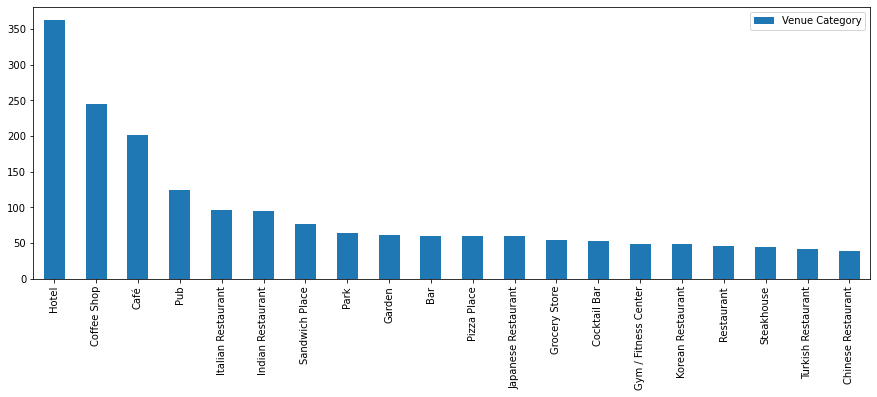

In [53]:
kcluster0_venues = kcluster0_all['Venue Category'].value_counts().to_frame()
kcluster0_venues.head(20).plot(kind='bar', figsize=(15,5))

### Cluster 1

In [54]:
kcluster1 = kcluster_venues[kcluster_venues['Cluster Labels'] == 1]
kcluster1.head()

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue
0,Abbey Wood,1,Lake,Park,Empanada Restaurant
69,Colindale,1,Park,Thrift / Vintage Store,Hobby Shop
76,Crossness,1,Lake,Park,Empanada Restaurant
122,Grahame Park,1,Park,Thrift / Vintage Store,Hobby Shop
163,The Hyde,1,Park,Thrift / Vintage Store,Hobby Shop


In [55]:
kcluster1['1st Most Common Venue'].value_counts()

Park             6
Lake             3
Train Station    1
Name: 1st Most Common Venue, dtype: int64

In [56]:
kcluster1['2nd Most Common Venue'].value_counts()

Thrift / Vintage Store    5
Park                      4
Garden                    1
Name: 2nd Most Common Venue, dtype: int64

In [57]:
kcluster1['3rd Most Common Venue'].value_counts()

Hobby Shop             5
Empanada Restaurant    3
Yoga Studio            1
Playground             1
Name: 3rd Most Common Venue, dtype: int64

In [58]:
kcluster1_all = pd.merge(kcluster1, london_venues, on="Neighborhood")
print('The total number of venues is:', kcluster1_all['Venue Category'].value_counts().sum())
kcluster1_all['Venue Category'].value_counts().to_frame().head(20)

The total number of venues is: 39


,Venue Category
Park,16
Hobby Shop,5
Thrift / Vintage Store,5
Discount Store,5
Lake,3
Train Station,2
Garden,1
Tennis Court,1
Playground,1


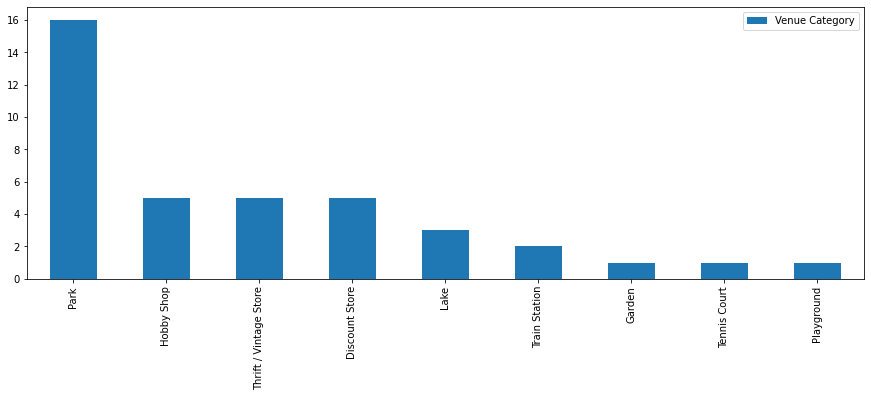

In [59]:
kcluster1_venues = kcluster1_all['Venue Category'].value_counts().to_frame()
kcluster1_venues.head(20).plot(kind='bar', figsize=(15,5))

### Cluster 2

In [60]:
kcluster2 = kcluster_venues[kcluster_venues['Cluster Labels'] == 2]
kcluster2.head()

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue
103,Eltham,2,Motorcycle Shop,Convenience Store,Pet Store
201,Middle Park,2,Motorcycle Shop,Convenience Store,Pet Store
207,Mottingham,2,Motorcycle Shop,Convenience Store,Pet Store
212,New Eltham,2,Motorcycle Shop,Convenience Store,Pet Store
328,Well Hall,2,Motorcycle Shop,Convenience Store,Pet Store


In [61]:
kcluster2['1st Most Common Venue'].value_counts()

Motorcycle Shop    5
Name: 1st Most Common Venue, dtype: int64

In [62]:
kcluster2['2nd Most Common Venue'].value_counts()

Convenience Store    5
Name: 2nd Most Common Venue, dtype: int64

In [63]:
kcluster2['3rd Most Common Venue'].value_counts()

Pet Store    5
Name: 3rd Most Common Venue, dtype: int64

In [64]:
kcluster2_all = pd.merge(kcluster2, london_venues, on="Neighborhood")
print('The total number of venues is:', kcluster2_all['Venue Category'].value_counts().sum())
kcluster2_all['Venue Category'].value_counts().to_frame().head(20)

The total number of venues is: 20


,Venue Category
Convenience Store,5
Motorcycle Shop,5
Gym / Fitness Center,5
Pet Store,5


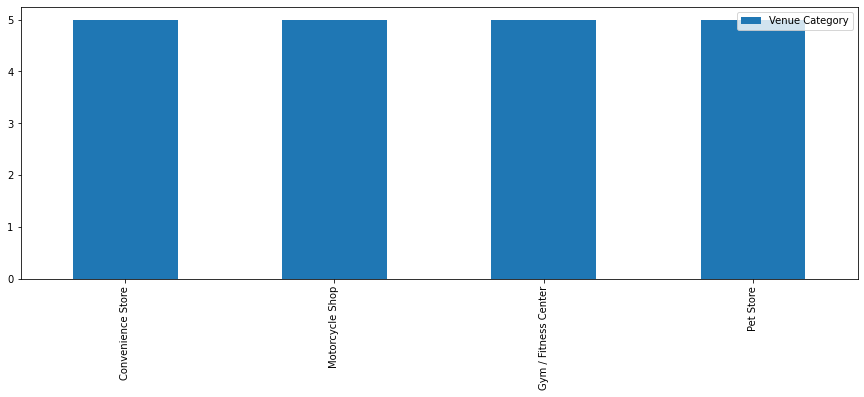

In [65]:
kcluster2_venues = kcluster2_all['Venue Category'].value_counts().to_frame()
kcluster2_venues.head(20).plot(kind='bar', figsize=(15,5))

### Cluster 3

In [66]:
kcluster3 = kcluster_venues[kcluster_venues['Cluster Labels'] == 3]
kcluster3.head()

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue
4,Aldwych,3,Pub,Coffee Shop,Sandwich Place
8,Archway,3,Café,Thai Restaurant,Pub
9,Arnos Grove,3,Pub,Coffee Shop,Café
10,Arnos Grove,3,Pub,Coffee Shop,Café
11,Balham,3,Coffee Shop,Tennis Court,Hardware Store


In [67]:
kcluster3['1st Most Common Venue'].value_counts()

Pub                      77
Coffee Shop              42
Café                     20
Italian Restaurant       12
Chinese Restaurant        6
Park                      5
Lake                      4
Outdoors & Recreation     3
Convenience Store         3
Bar                       3
Bus Stop                  3
Home Service              3
Spa                       3
Gastropub                 2
Gym / Fitness Center      2
Brewery                   2
Portuguese Restaurant     2
Grocery Store             2
Bakery                    1
Supermarket               1
Name: 1st Most Common Venue, dtype: int64

In [68]:
kcluster3['2nd Most Common Venue'].value_counts()

Coffee Shop             36
Pub                     32
Café                    20
Grocery Store           16
Park                    15
Italian Restaurant      12
Bakery                  12
Chinese Restaurant       6
Bar                      5
Pizza Place              5
Caribbean Restaurant     5
Gym / Fitness Center     4
Cocktail Bar             4
Hotel                    3
Fish & Chips Shop        3
Convenience Store        3
Food                     2
Gastropub                2
Cosmetics Shop           2
Thai Restaurant          2
Brewery                  2
Yoga Studio              1
Tennis Court             1
Wine Shop                1
Platform                 1
Bus Stop                 1
Name: 2nd Most Common Venue, dtype: int64

In [69]:
kcluster3['3rd Most Common Venue'].value_counts()

Café                      22
Pizza Place               19
Grocery Store             19
Pub                       19
Coffee Shop               10
Bakery                    10
Bar                        7
Hotel                      6
Park                       6
Food Truck                 6
Sandwich Place             6
Chinese Restaurant         5
Farmers Market             5
Fishing Spot               4
Portuguese Restaurant      4
Italian Restaurant         4
Convenience Store          3
Vietnamese Restaurant      3
Gym / Fitness Center       3
Stables                    3
Furniture / Home Store     3
Auto Garage                3
Market                     3
Garden Center              3
Breakfast Spot             2
Garden                     2
Plaza                      2
Yoga Studio                2
Pet Store                  2
Boutique                   2
Bus Stop                   2
Music Venue                2
Thai Restaurant            1
Seafood Restaurant         1
Hardware Store

In [70]:
kcluster3_all = pd.merge(kcluster3, london_venues, on="Neighborhood")
print('The total number of venues is:', kcluster3_all['Venue Category'].value_counts().sum())
kcluster3_all['Venue Category'].value_counts().to_frame().head(20)

The total number of venues is: 11346


,Venue Category
Pub,876
Coffee Shop,775
Café,469
Italian Restaurant,347
Park,319
Grocery Store,282
Pizza Place,266
Hotel,257
Bar,250
Gym / Fitness Center,220


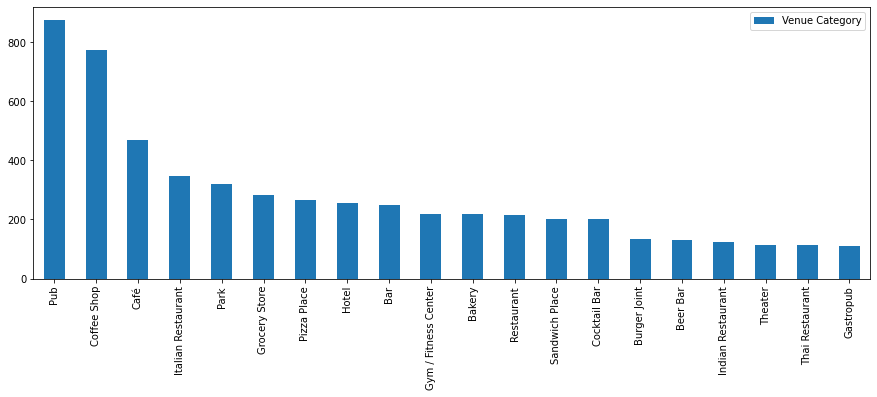

In [71]:
kcluster3_venues = kcluster3_all['Venue Category'].value_counts().to_frame()
kcluster3_venues.head(20).plot(kind='bar', figsize=(15,5))

### Cluster 4

In [72]:
kcluster4 = kcluster_venues[kcluster_venues['Cluster Labels'] == 4]
kcluster4.head()

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue
1,Acton,4,Theater,Hotel,Bakery
2,Acton,4,Theater,Hotel,Bakery
5,Anerley,4,Bus Station,Bus Stop,Forest
6,Angel,4,Theater,Coffee Shop,Pub
7,Angel,4,Theater,Coffee Shop,Pub


In [73]:
kcluster4['1st Most Common Venue'].value_counts()

Theater         75
Pub              9
Hotel            8
Coffee Shop      3
Bus Station      2
Tea Room         2
Spa              2
Café             2
Cocktail Bar     2
Name: 1st Most Common Venue, dtype: int64

In [74]:
kcluster4['2nd Most Common Venue'].value_counts()

Hotel                    74
Tea Room                  6
Bakery                    5
Café                      5
Coffee Shop               4
Italian Restaurant        3
Outdoors & Recreation     2
Athletics & Sports        2
Theater                   2
Bus Stop                  2
Name: 2nd Most Common Venue, dtype: int64

In [75]:
kcluster4['3rd Most Common Venue'].value_counts()

Bakery                        63
Theater                       11
Hotel                         10
Boutique                       6
Cocktail Bar                   5
Café                           2
Pub                            2
Garden Center                  2
Forest                         2
Construction & Landscaping     2
Name: 3rd Most Common Venue, dtype: int64

In [76]:
kcluster4_all = pd.merge(kcluster4, london_venues, on="Neighborhood")
print('The total number of venues is:', kcluster4_all['Venue Category'].value_counts().sum())
kcluster4_all['Venue Category'].value_counts().to_frame().head(20)

The total number of venues is: 13083


,Venue Category
Theater,717
Hotel,674
Bakery,500
Plaza,467
Monument / Landmark,461
Cocktail Bar,429
Pub,378
Café,371
Japanese Restaurant,368
Sandwich Place,366


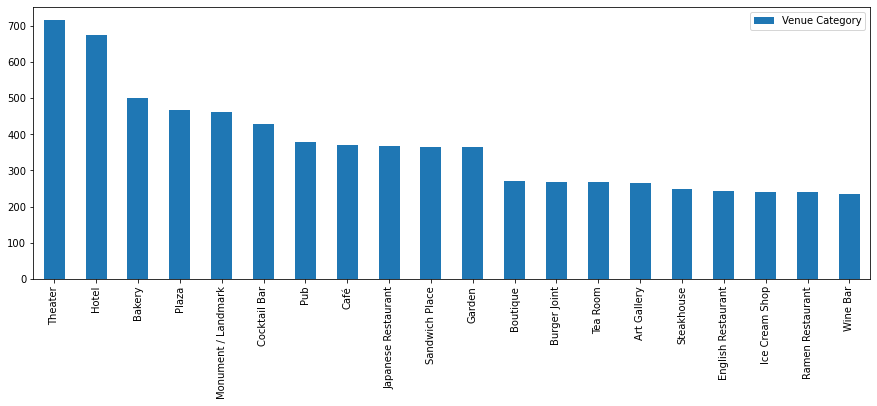

In [77]:
kcluster4_venues = kcluster4_all['Venue Category'].value_counts().to_frame()
kcluster4_venues.head(20).plot(kind='bar', figsize=(15,5))

---
## Detailed analysis of Cluster 0

Cluster 3 is were most of the commercial activity is located. So it seems obvious that it is were we want our new coffee shop to be. Now let's explore it in further detail and see if we can run another cluster analysis and further determine were within Cluster 0 we would want to be.

In [166]:
c0_df = kcluster_venues[['Neighborhood', 'Cluster Labels']]
c0_df = c0_df[c0_df['Cluster Labels'] == 0]
c0_df = pd.merge(c0_df, london_venues, on="Neighborhood")
c0_df.reset_index(drop=True, inplace=True)
c0_df.head()
c0_df

,Neighborhood,Cluster Labels,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Aldgate,0,51.513145,-0.078733,The Association,51.513733,-0.079132,Coffee Shop
1,Aldgate,0,51.513145,-0.078733,Swingers - The Crazy Golf Club,51.514202,-0.080383,Mini Golf
2,Aldgate,0,51.513145,-0.078733,Hotel Indigo,51.512740,-0.075920,Hotel
3,Aldgate,0,51.513145,-0.078733,The Garden at 120,51.512101,-0.080799,Garden
4,Aldgate,0,51.513145,-0.078733,Farmer J,51.513605,-0.080783,Salad Place
...,...,...,...,...,...,...,...,...
3299,West Hampstead,0,51.533085,-0.195979,Rafkins,51.536423,-0.191613,New American Restaurant
3300,West Hampstead,0,51.533085,-0.195979,Executive Lounge,51.535457,-0.189927,Lounge
3301,West Hampstead,0,51.533085,-0.195979,Starbucks,51.536582,-0.191596,Coffee Shop
3302,West Hampstead,0,51.533085,-0.195979,Woodhouse Urban Park,51.533989,-0.201370,Park


one hot encoding

In [167]:
london_onehot0 = pd.get_dummies(c0_df[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
london_onehot0['Neighborhood'] = c0_df['Neighborhood'] 

london_onehot.head()

,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Aquarium,Arcade,Arepa Restaurant,Argentinian Restaurant,...,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Whisky Bar,Wine Bar,Wine Shop,Winery,Women's Store,Yoga Studio
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [168]:
london_grouped0 = london_onehot0.groupby('Neighborhood').mean().reset_index()
london_grouped0

,Neighborhood,African Restaurant,American Restaurant,Antique Shop,Aquarium,Arcade,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,...,Trail,Train Station,Tunnel,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Whisky Bar,Wine Bar,Wine Shop,Yoga Studio
0,Aldgate,0.000000,0.000000,0.00000,0.000000,0.000000,0.022989,0.000000,0.000000,0.022989,...,0.00000,0.000000,0.000000,0.022989,0.000000,0.011494,0.000000,0.034483,0.011494,0.000000
1,Bankside,0.000000,0.000000,0.00000,0.014493,0.014493,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.014493,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,Bermondsey,0.000000,0.000000,0.00000,0.014493,0.014493,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.014493,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,Brent Cross,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,Brondesbury,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,"Burroughs, The",0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,Cann Hall,0.010870,0.000000,0.00000,0.000000,0.000000,0.000000,0.021739,0.010870,0.000000,...,0.00000,0.000000,0.000000,0.021739,0.000000,0.000000,0.000000,0.000000,0.000000,0.010870
7,Earls Court,0.000000,0.000000,0.00813,0.000000,0.000000,0.000000,0.000000,0.008130,0.000000,...,0.00813,0.008130,0.008130,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,Elephant and Castle,0.000000,0.004975,0.00000,0.009950,0.009950,0.009950,0.000000,0.000000,0.004975,...,0.00000,0.000000,0.000000,0.009950,0.000000,0.004975,0.004975,0.009950,0.004975,0.000000
9,Golders Green,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.018182,0.000000,0.000000,...,0.00000,0.018182,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [169]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted0 = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted0['Neighborhood'] = london_grouped0['Neighborhood']

for ind in np.arange(london_grouped0.shape[0]):
    neighborhoods_venues_sorted0.iloc[ind, 1:] = return_most_common_venues(london_grouped0.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted0.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Aldgate,Hotel,Coffee Shop,Gym / Fitness Center,English Restaurant,Cocktail Bar,Garden,Restaurant,Wine Bar,Asian Restaurant,Hotel Bar
1,Bankside,Coffee Shop,Hotel,Café,Sandwich Place,Korean Restaurant,Park,Japanese Restaurant,Bar,General Entertainment,Fish & Chips Shop
2,Bermondsey,Coffee Shop,Hotel,Café,Sandwich Place,Korean Restaurant,Park,Japanese Restaurant,Bar,General Entertainment,Fish & Chips Shop
3,Brent Cross,Hotel,Home Service,Pizza Place,Rugby Pitch,Furniture / Home Store,Park,Falafel Restaurant,Fish & Chips Shop,Film Studio,Filipino Restaurant
4,Brondesbury,Hotel,Park,Lounge,New American Restaurant,Café,Athletics & Sports,Coffee Shop,Pub,Middle Eastern Restaurant,Fabric Shop


K-means clustering

In [170]:
# set number of clusters
kclusters = 5

london_grouped_clustering0 = london_grouped0.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=1).fit(london_grouped_clustering0)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([3, 3, 3, 4, 2, 1, 0, 3, 3, 3], dtype=int32)

In [171]:
neighborhoods_venues_sorted0.insert(0, 'Cluster Labels', kmeans.labels_)
neighborhoods_venues_sorted0.head(20)

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,3,Aldgate,Hotel,Coffee Shop,Gym / Fitness Center,English Restaurant,Cocktail Bar,Garden,Restaurant,Wine Bar,Asian Restaurant,Hotel Bar
1,3,Bankside,Coffee Shop,Hotel,Café,Sandwich Place,Korean Restaurant,Park,Japanese Restaurant,Bar,General Entertainment,Fish & Chips Shop
2,3,Bermondsey,Coffee Shop,Hotel,Café,Sandwich Place,Korean Restaurant,Park,Japanese Restaurant,Bar,General Entertainment,Fish & Chips Shop
3,4,Brent Cross,Hotel,Home Service,Pizza Place,Rugby Pitch,Furniture / Home Store,Park,Falafel Restaurant,Fish & Chips Shop,Film Studio,Filipino Restaurant
4,2,Brondesbury,Hotel,Park,Lounge,New American Restaurant,Café,Athletics & Sports,Coffee Shop,Pub,Middle Eastern Restaurant,Fabric Shop
5,1,"Burroughs, The",Hotel,Rugby Pitch,Farm,Food Stand,Food & Drink Shop,Flea Market,Fish & Chips Shop,Film Studio,Filipino Restaurant,Fast Food Restaurant
6,0,Cann Hall,Hotel,Coffee Shop,Indian Restaurant,Café,Pub,Pizza Place,Korean Restaurant,Grocery Store,Sandwich Place,Park
7,3,Earls Court,Hotel,Italian Restaurant,Coffee Shop,Café,Garden,Pub,Cocktail Bar,Indian Restaurant,Thai Restaurant,Grocery Store
8,3,Elephant and Castle,Coffee Shop,Hotel,Café,Pub,Bar,Sandwich Place,Park,Beer Bar,Garden,Pizza Place
9,3,Golders Green,Hotel,Coffee Shop,Chocolate Shop,Beer Bar,Gastropub,Modern European Restaurant,Deli / Bodega,Café,Sandwich Place,Breakfast Spot


In [172]:
neighborhoods_venues_sorted0.shape

(31, 12)

## Adding coordinates

In [173]:
c0_lonlat = c0_df[['Neighborhood', 'Neighborhood Latitude', 'Neighborhood Longitude']]
c0_lonlat = c0_lonlat.groupby('Neighborhood').mean().reset_index()
c0_lonlat.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude
0,Aldgate,51.513145,-0.078733
1,Bankside,51.500212,-0.115440
2,Bermondsey,51.500212,-0.115440
3,Brent Cross,51.577247,-0.216162
4,Brondesbury,51.533085,-0.195979


In [174]:
c0_lonlat.shape

(31, 3)

In [175]:
c0_cluster = neighborhoods_venues_sorted0[['Neighborhood', 'Cluster Labels']]
c0_cluster.head()

,Neighborhood,Cluster Labels
0,Aldgate,3
1,Bankside,3
2,Bermondsey,3
3,Brent Cross,4
4,Brondesbury,2


In [176]:
london_merged0 = pd.merge(c0_cluster, c0_lonlat, on='Neighborhood')
london_merged0.rename(columns = {'Neighborhood Latitude': 'Latitude', 'Neighborhood Longitude': 'Longitude'}, inplace = True)
london_merged0.head()

,Neighborhood,Cluster Labels,Latitude,Longitude
0,Aldgate,3,51.513145,-0.078733
1,Bankside,3,51.500212,-0.115440
2,Bermondsey,3,51.500212,-0.115440
3,Brent Cross,4,51.577247,-0.216162
4,Brondesbury,2,51.533085,-0.195979


In [177]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12, tiles='Stamen Terrain', attr=None)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(london_merged0['Latitude'], london_merged0['Longitude'], london_merged0['Neighborhood'], london_merged0['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

---
## Let's explore these clusters in more detail

In [178]:
detailedK0_venues = neighborhoods_venues_sorted0

### Cluster 0.0

In [179]:
kcluster00 = detailedK0_venues[detailedK0_venues['Cluster Labels'] == 0]
kcluster00.head()

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,0,Cann Hall,Hotel,Coffee Shop,Indian Restaurant,Café,Pub,Pizza Place,Korean Restaurant,Grocery Store,Sandwich Place,Park
14,0,Lea Bridge,Café,Hotel,Park,Grocery Store,Indian Restaurant,Fried Chicken Joint,Chinese Restaurant,Farm,General Entertainment,Concert Hall
15,0,Leyton,Pub,Hotel,Indian Restaurant,Park,Coffee Shop,Bakery,Café,Grocery Store,Farm,Fried Chicken Joint
16,0,Leytonstone,Hotel,Coffee Shop,Indian Restaurant,Café,Pub,Pizza Place,Korean Restaurant,Grocery Store,Sandwich Place,Park
17,0,Little Ilford,Grocery Store,Hotel,Indian Restaurant,Fast Food Restaurant,Pub,Bus Stop,Coffee Shop,Ice Cream Shop,Café,Snack Place


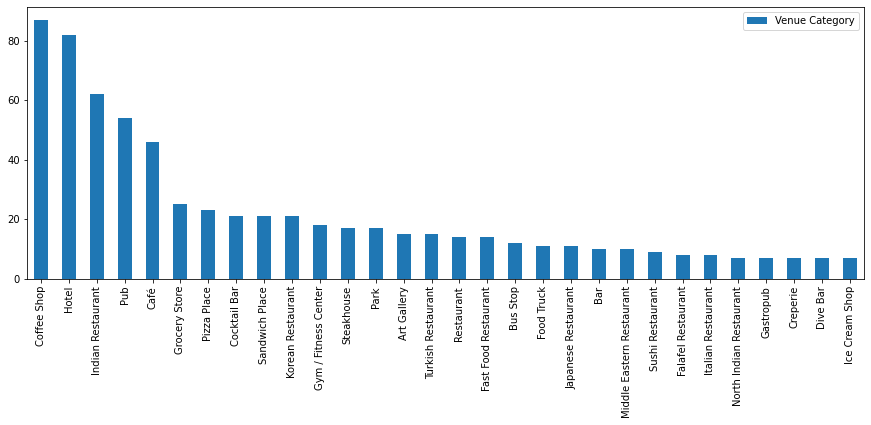

In [180]:
kcluster00_all = pd.merge(kcluster00, london_venues, on="Neighborhood")
kcluster00_venues = kcluster00_all['Venue Category'].value_counts().to_frame()
kcluster00_venues.head(30).plot(kind='bar', figsize=(15,5))

In [181]:
print('The total number of venues is:', kcluster00_all['Venue Category'].value_counts().sum())
kcluster00_all['Venue Category'].value_counts().to_frame()

The total number of venues is: 866


,Venue Category
Coffee Shop,87
Hotel,82
Indian Restaurant,62
Pub,54
Café,46
...,...
Thrift / Vintage Store,1
Deli / Bodega,1
Bookstore,1
Tapas Restaurant,1


In [182]:
kcluster00_supp = kcluster00_all[kcluster00_all['Venue Category'].str.contains('University|Theater|Museum|Library|Hall')]
kcluster00_supp.head()

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
3,0,Cann Hall,Hotel,Coffee Shop,Indian Restaurant,Café,Pub,Pizza Place,Korean Restaurant,Grocery Store,Sandwich Place,Park,51.514399,-0.065515,Curzon Aldgate,51.513657,-0.069217,Movie Theater
69,0,Cann Hall,Hotel,Coffee Shop,Indian Restaurant,Café,Pub,Pizza Place,Korean Restaurant,Grocery Store,Sandwich Place,Park,51.514399,-0.065515,Jack the Ripper Museum,51.510782,-0.067922,History Museum
98,0,Lea Bridge,Café,Hotel,Park,Grocery Store,Indian Restaurant,Fried Chicken Joint,Chinese Restaurant,Farm,General Entertainment,Concert Hall,51.513510,-0.047457,Troxy,51.512807,-0.044016,Concert Hall
120,0,Leyton,Pub,Hotel,Indian Restaurant,Park,Coffee Shop,Bakery,Café,Grocery Store,Farm,Fried Chicken Joint,51.513510,-0.047457,Troxy,51.512807,-0.044016,Concert Hall
167,0,Leytonstone,Hotel,Coffee Shop,Indian Restaurant,Café,Pub,Pizza Place,Korean Restaurant,Grocery Store,Sandwich Place,Park,51.514399,-0.065515,Curzon Aldgate,51.513657,-0.069217,Movie Theater


## Cluster 0.1

In [183]:
kcluster01 = detailedK0_venues[detailedK0_venues['Cluster Labels'] == 1]
kcluster01.head()

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,1,"Burroughs, The",Hotel,Rugby Pitch,Farm,Food Stand,Food & Drink Shop,Flea Market,Fish & Chips Shop,Film Studio,Filipino Restaurant,Fast Food Restaurant
10,1,Hendon,Hotel,Rugby Pitch,Farm,Food Stand,Food & Drink Shop,Flea Market,Fish & Chips Shop,Film Studio,Filipino Restaurant,Fast Food Restaurant


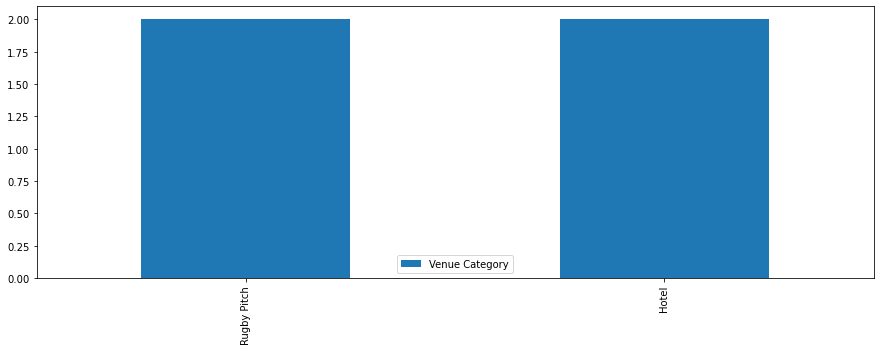

In [184]:
kcluster01_all = pd.merge(kcluster01, london_venues, on="Neighborhood")
kcluster01_venues = kcluster01_all['Venue Category'].value_counts().to_frame()
kcluster01_venues.head(30).plot(kind='bar', figsize=(15,5))

In [185]:
print('The total number of venues is:', kcluster01_all['Venue Category'].value_counts().sum())
kcluster01_all['Venue Category'].value_counts().to_frame()

The total number of venues is: 4


,Venue Category
Rugby Pitch,2
Hotel,2


## Cluster 0.2

In [186]:
kcluster02 = detailedK0_venues[detailedK0_venues['Cluster Labels'] == 2]
kcluster02.head()

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,2,Brondesbury,Hotel,Park,Lounge,New American Restaurant,Café,Athletics & Sports,Coffee Shop,Pub,Middle Eastern Restaurant,Fabric Shop
12,2,Kilburn,Hotel,Park,Lounge,New American Restaurant,Café,Athletics & Sports,Coffee Shop,Pub,Middle Eastern Restaurant,Fabric Shop
20,2,Queen's Park,Hotel,Park,Lounge,New American Restaurant,Café,Athletics & Sports,Coffee Shop,Pub,Middle Eastern Restaurant,Fabric Shop
30,2,West Hampstead,Hotel,Park,Lounge,New American Restaurant,Café,Athletics & Sports,Coffee Shop,Pub,Middle Eastern Restaurant,Fabric Shop


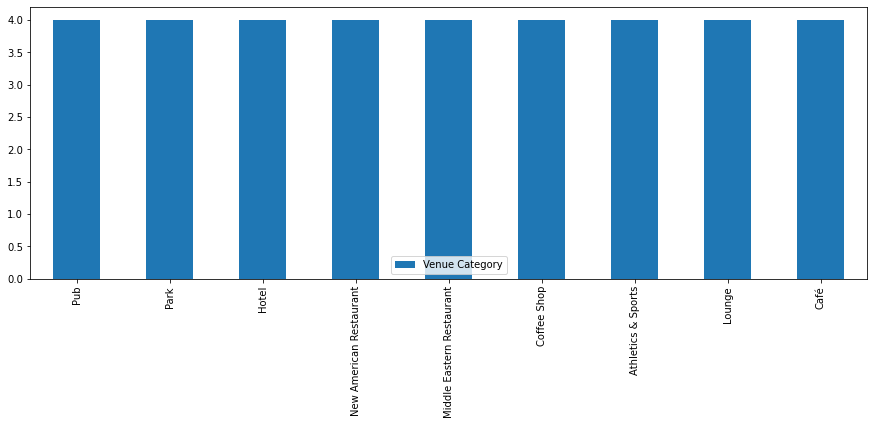

In [187]:
kcluster02_all = pd.merge(kcluster02, london_venues, on="Neighborhood")
kcluster02_venues = kcluster02_all['Venue Category'].value_counts().to_frame()
kcluster02_venues.head(30).plot(kind='bar', figsize=(15,5))

In [188]:
print('The total number of venues is:', kcluster02_all['Venue Category'].value_counts().sum())
kcluster02_all['Venue Category'].value_counts().to_frame()

The total number of venues is: 36


,Venue Category
Pub,4
Park,4
Hotel,4
New American Restaurant,4
Middle Eastern Restaurant,4
Coffee Shop,4
Athletics & Sports,4
Lounge,4
Café,4


## Cluster 0.3

In [189]:
kcluster03 = detailedK0_venues[detailedK0_venues['Cluster Labels'] == 3]
kcluster03.head()

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,3,Aldgate,Hotel,Coffee Shop,Gym / Fitness Center,English Restaurant,Cocktail Bar,Garden,Restaurant,Wine Bar,Asian Restaurant,Hotel Bar
1,3,Bankside,Coffee Shop,Hotel,Café,Sandwich Place,Korean Restaurant,Park,Japanese Restaurant,Bar,General Entertainment,Fish & Chips Shop
2,3,Bermondsey,Coffee Shop,Hotel,Café,Sandwich Place,Korean Restaurant,Park,Japanese Restaurant,Bar,General Entertainment,Fish & Chips Shop
7,3,Earls Court,Hotel,Italian Restaurant,Coffee Shop,Café,Garden,Pub,Cocktail Bar,Indian Restaurant,Thai Restaurant,Grocery Store
8,3,Elephant and Castle,Coffee Shop,Hotel,Café,Pub,Bar,Sandwich Place,Park,Beer Bar,Garden,Pizza Place


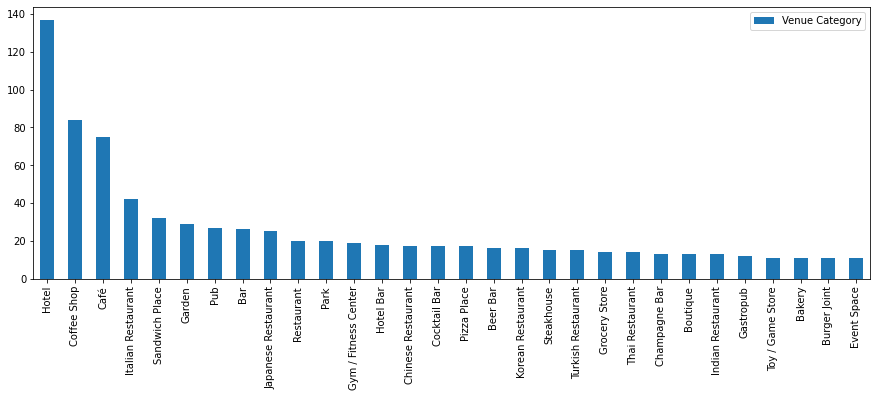

In [190]:
kcluster03_all = pd.merge(kcluster03, london_venues, on="Neighborhood")
kcluster03_venues = kcluster03_all['Venue Category'].value_counts().to_frame()
kcluster03_venues.head(30).plot(kind='bar', figsize=(15,5))

In [191]:
print('The total number of venues is:', kcluster03_all['Venue Category'].value_counts().sum())
kcluster03_all['Venue Category'].value_counts().to_frame()

The total number of venues is: 1245


,Venue Category
Hotel,137
Coffee Shop,84
Café,75
Italian Restaurant,42
Sandwich Place,32
...,...
Whisky Bar,1
Film Studio,1
Church,1
Food Stand,1


## Cluster 0.4

In [192]:
kcluster04 = detailedK0_venues[detailedK0_venues['Cluster Labels'] == 4]
kcluster04.head()

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,4,Brent Cross,Hotel,Home Service,Pizza Place,Rugby Pitch,Furniture / Home Store,Park,Falafel Restaurant,Fish & Chips Shop,Film Studio,Filipino Restaurant


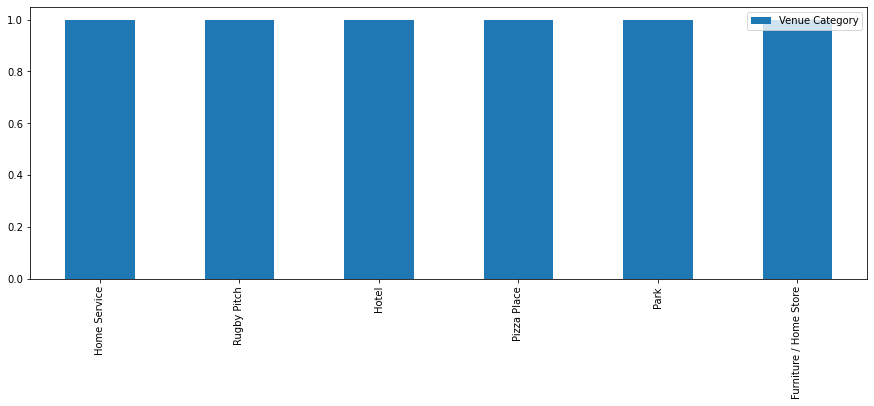

In [193]:
kcluster04_all = pd.merge(kcluster04, london_venues, on="Neighborhood")
kcluster04_venues = kcluster04_all['Venue Category'].value_counts().to_frame()
kcluster04_venues.head(30).plot(kind='bar', figsize=(15,5))

In [194]:
print('The total number of venues is:', kcluster04_all['Venue Category'].value_counts().sum())
kcluster04_all['Venue Category'].value_counts().to_frame()

The total number of venues is: 6


,Venue Category
Home Service,1
Rugby Pitch,1
Hotel,1
Pizza Place,1
Park,1
Furniture / Home Store,1


## Exploring Supporting Venues for Cluster 0.0 and Cluster 0.3

In [145]:
kcluster03_all['Venue Category'].unique()

array(['Stables', 'Italian Restaurant', 'Grocery Store',
       'Outdoors & Recreation'], dtype=object)

### Cluster 0.0

In [195]:
kcluster00_supp = kcluster00_all[kcluster00_all['Venue Category'].str.contains('University|Theater|Museum|Library|Hall|Hotel|Tour|Art|Gallery|Community')]
kcluster00_supp.head()

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
1,0,Cann Hall,Hotel,Coffee Shop,Indian Restaurant,Café,Pub,Pizza Place,Korean Restaurant,Grocery Store,Sandwich Place,Park,51.514399,-0.065515,Qbic Hotel,51.516183,-0.067454,Hotel
3,0,Cann Hall,Hotel,Coffee Shop,Indian Restaurant,Café,Pub,Pizza Place,Korean Restaurant,Grocery Store,Sandwich Place,Park,51.514399,-0.065515,Curzon Aldgate,51.513657,-0.069217,Movie Theater
9,0,Cann Hall,Hotel,Coffee Shop,Indian Restaurant,Café,Pub,Pizza Place,Korean Restaurant,Grocery Store,Sandwich Place,Park,51.514399,-0.065515,Premier Inn London City Aldgate,51.514202,-0.069735,Hotel
19,0,Cann Hall,Hotel,Coffee Shop,Indian Restaurant,Café,Pub,Pizza Place,Korean Restaurant,Grocery Store,Sandwich Place,Park,51.514399,-0.065515,Stolen Space Gallery,51.516455,-0.070071,Art Gallery
21,0,Cann Hall,Hotel,Coffee Shop,Indian Restaurant,Café,Pub,Pizza Place,Korean Restaurant,Grocery Store,Sandwich Place,Park,51.514399,-0.065515,4D Modelshop,51.511236,-0.068729,Arts & Crafts Store


In [196]:
print('The total number of venues is:', kcluster00_supp['Venue Category'].value_counts().sum())
kcluster00_supp['Venue Category'].value_counts().to_frame()

The total number of venues is: 122


,Venue Category
Hotel,82
Art Gallery,15
Movie Theater,5
Arts & Crafts Store,5
History Museum,5
Hotel Bar,5
Street Art,2
Concert Hall,2
Performing Arts Venue,1


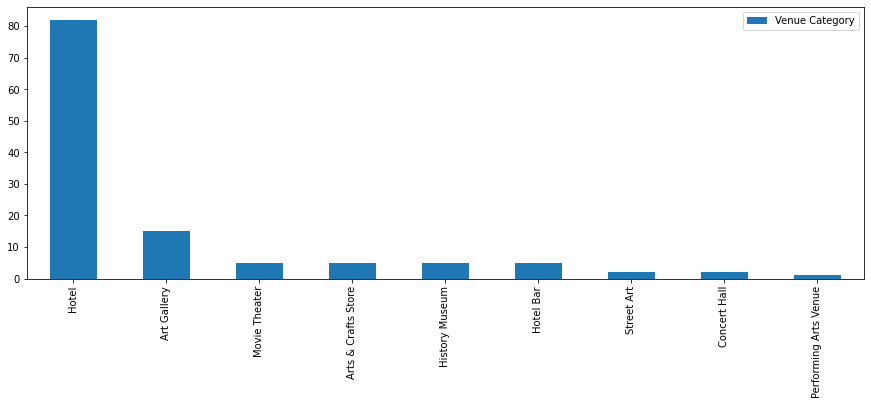

In [204]:
plt00 = kcluster00_supp['Venue Category'].value_counts().to_frame()
plt00.plot(kind='bar', figsize=(15,5))

## Cluster 0.3

In [199]:
kcluster03_supp = kcluster03_all[kcluster03_all['Venue Category'].str.contains('University|Theater|Museum|Library|Hall|Hotel|Tour|Art|Gallery|Community')]
kcluster03_supp.head()

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
2,3,Aldgate,Hotel,Coffee Shop,Gym / Fitness Center,English Restaurant,Cocktail Bar,Garden,Restaurant,Wine Bar,Asian Restaurant,Hotel Bar,51.513145,-0.078733,Hotel Indigo,51.512740,-0.075920,Hotel
5,3,Aldgate,Hotel,Coffee Shop,Gym / Fitness Center,English Restaurant,Cocktail Bar,Garden,Restaurant,Wine Bar,Asian Restaurant,Hotel Bar,51.513145,-0.078733,Dorsett City London,51.514036,-0.075812,Hotel
8,3,Aldgate,Hotel,Coffee Shop,Gym / Fitness Center,English Restaurant,Cocktail Bar,Garden,Restaurant,Wine Bar,Asian Restaurant,Hotel Bar,51.513145,-0.078733,DoubleTree by Hilton,51.510999,-0.078306,Hotel
14,3,Aldgate,Hotel,Coffee Shop,Gym / Fitness Center,English Restaurant,Cocktail Bar,Garden,Restaurant,Wine Bar,Asian Restaurant,Hotel Bar,51.513145,-0.078733,Hotel Motel One London-Tower Hill,51.512635,-0.075513,Hotel
15,3,Aldgate,Hotel,Coffee Shop,Gym / Fitness Center,English Restaurant,Cocktail Bar,Garden,Restaurant,Wine Bar,Asian Restaurant,Hotel Bar,51.513145,-0.078733,Four Seasons Hotel at Ten Trinity Square,51.510140,-0.077847,Hotel


In [200]:
print('The total number of venues is:', kcluster03_supp['Venue Category'].value_counts().sum())
kcluster03_supp['Venue Category'].value_counts().to_frame()

The total number of venues is: 205


,Venue Category
Hotel,137
Hotel Bar,18
Theater,9
Indie Theater,8
Movie Theater,8
Street Art,8
History Museum,8
Art Gallery,3
Tour Provider,2
Performing Arts Venue,2


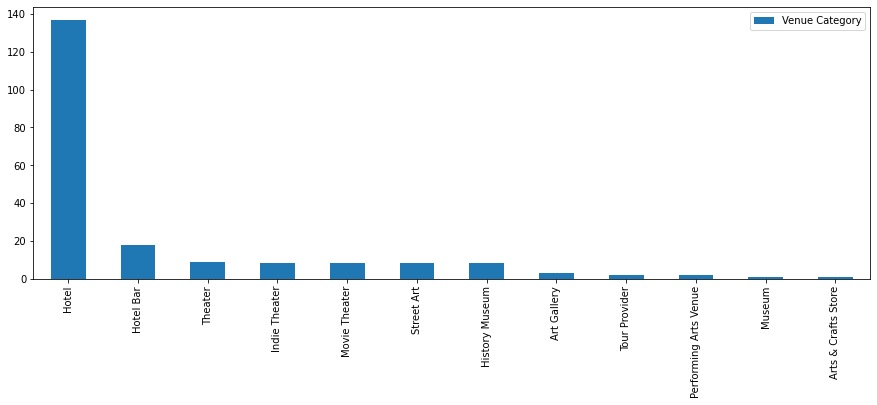

In [201]:
plt03 = kcluster03_supp['Venue Category'].value_counts().to_frame()
plt03.plot(kind='bar', figsize=(15,5))

## Visualizing the final cluster

In [202]:
final_location = london_merged0[london_merged0['Cluster Labels'] == 3]
final_location.head()

,Neighborhood,Cluster Labels,Latitude,Longitude
0,Aldgate,3,51.513145,-0.078733
1,Bankside,3,51.500212,-0.115440
2,Bermondsey,3,51.500212,-0.115440
7,Earls Court,3,51.488765,-0.187296
8,Elephant and Castle,3,51.500514,-0.108574


In [203]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12, attr=None)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(final_location['Latitude'], final_location['Longitude'], final_location['Neighborhood'], final_location['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Results and Discussion <a name="results"></a>

Starting a business is not only investing money. It is more than that. If you are going to start a new business that a complete and detailed analysis is required. It is time consuming effort. This effort will have long lasting fruits. In this case study a businessman in London has decided to open a new café in London. This man is looking for a place that has large amount of customers and low number of competitors.  This is not an easy task. We have chosen places that are in 500 radius. After choosing places we got their location. We performed data cleaning operation. This step will give required data that is necessary for this analysis. Than finding most top 10 most common places after that we applied k mean algorithm to make cluster.  Our aim is to find common places in each cluster. After performing all these steps we found cluster0 is most suitable for this business because it has large potential customers and low competitors.  We have cluster 3 also that have shown somehow similar results as cluster 0. But after detailed analysis we choose cluster 0.

## Conclusion <a name="conclusion"></a>

In this project we focused on area selection for new business related to coffee. We have performed detailed analysis that will give area that has maximum number of potential customers and less competitors.  We used unsupervised algorithm e,g K- mean to find clusters. We used this algorithm in more than one iteration to find best area for this business. Cluster 0 is proved to be best among all clusters. We used the foursquare API in our project. Geo coder API is used to get location that are in 500 meter radius. We then chose 10 best common places that are near places that are in 500 radius. After performing this analysis we have found two clusters that are suitable for this business cluster 0.0 and cluster 0.3. After running one more iteration we found that area suitable for this business should belong to cluster 0.3.